In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

assistance = pd.read_excel("DataDownload.xls",sheet_name="ASSISTANCE")
pricetax = pd.read_excel("DataDownload.xls",sheet_name="PRICES_TAXES")
health = pd.read_excel("DataDownload.xls",sheet_name="HEALTH")


print(assistance.shape)
print(pricetax.shape)
print(health.shape)

health.loc[:,"pct_obese_change"] = (health[["PCT_OBESE_ADULTS13"]].values - 
                           health[["PCT_OBESE_ADULTS08"]].values)
health.loc[:,"pct_diabetes_change"] = (health[["PCT_DIABETES_ADULTS13"]].values - 
                              health[["PCT_DIABETES_ADULTS08"]].values)


(3143, 48)
(3143, 11)
(3143, 14)


Price of low-fat milk/price of sodas in 2010 is positively correlated with adult diabetes rate in 2013, r=0.348251.

Soda price in 2010 is negatively correlated with both adult diabetes rate in 2013 (r = -0.305818) and adult obesity rate in 2013 (r = -0.267483). 

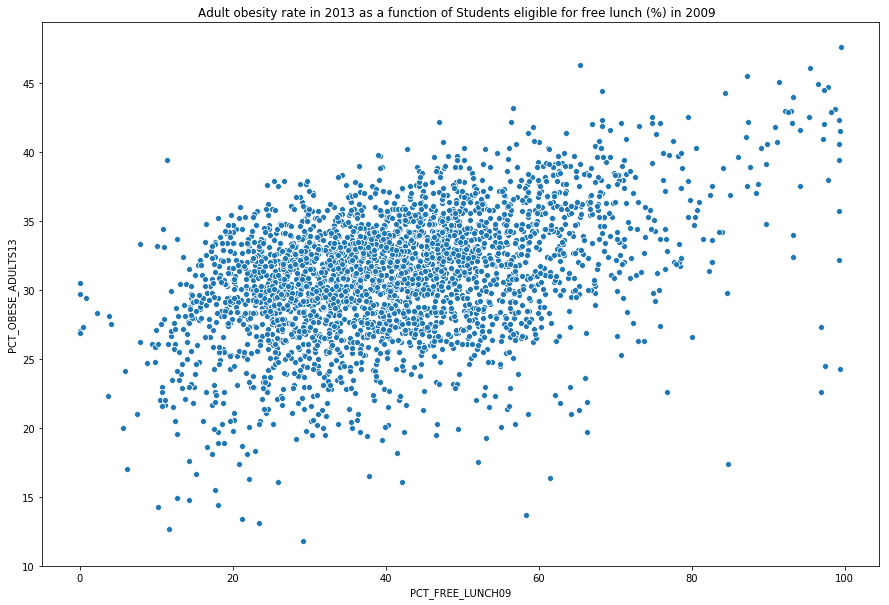

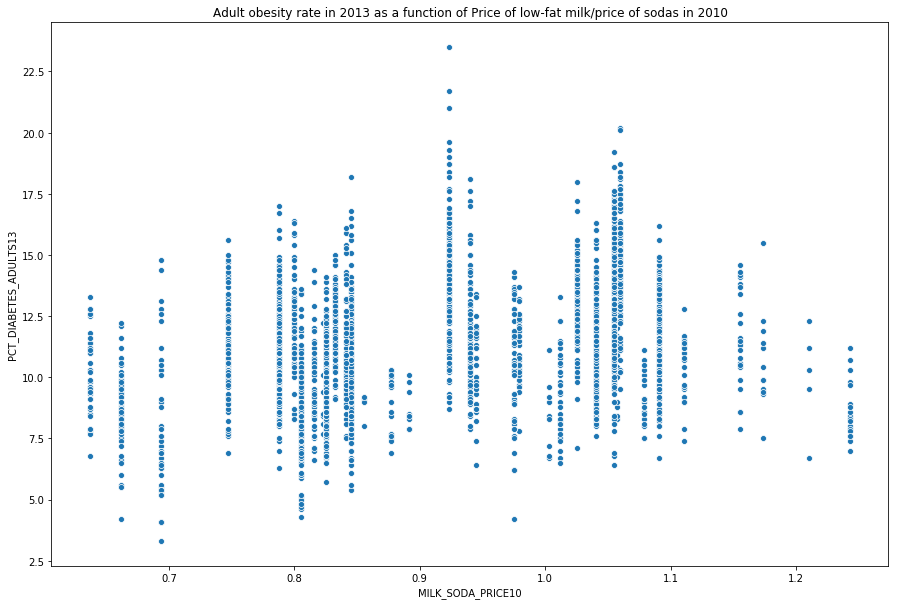

In [11]:
assheal = pd.merge(health,assistance[["FIPS","PCT_SBP09","PCT_REDUCED_LUNCH09",
                                      "PCT_FREE_LUNCH09","PCT_REDUCED_LUNCH14",
                                     "PCT_FREE_LUNCH14"]],on = "FIPS")

healtax = pd.merge(assheal[["FIPS","PCT_OBESE_ADULTS13",
                            "PCT_DIABETES_ADULTS13","RECFACPTH14"]], pricetax, on ="FIPS")

fig1 = plt.figure()
fig1.set_size_inches(15,10)
ax1 = sns.scatterplot(x="PCT_FREE_LUNCH09", y="PCT_OBESE_ADULTS13",data=assheal)
plt.title("Adult obesity rate in 2013 as a function of Students eligible for free lunch (%) in 2009  ")
plt.show()


fig2 = plt.figure()
fig2.set_size_inches(15,10)
ax2 = sns.scatterplot(x="MILK_SODA_PRICE10", y="PCT_DIABETES_ADULTS13",data=healtax)
plt.title("Adult obesity rate in 2013 as a function of Price of low-fat milk/price of sodas in 2010")
plt.show()




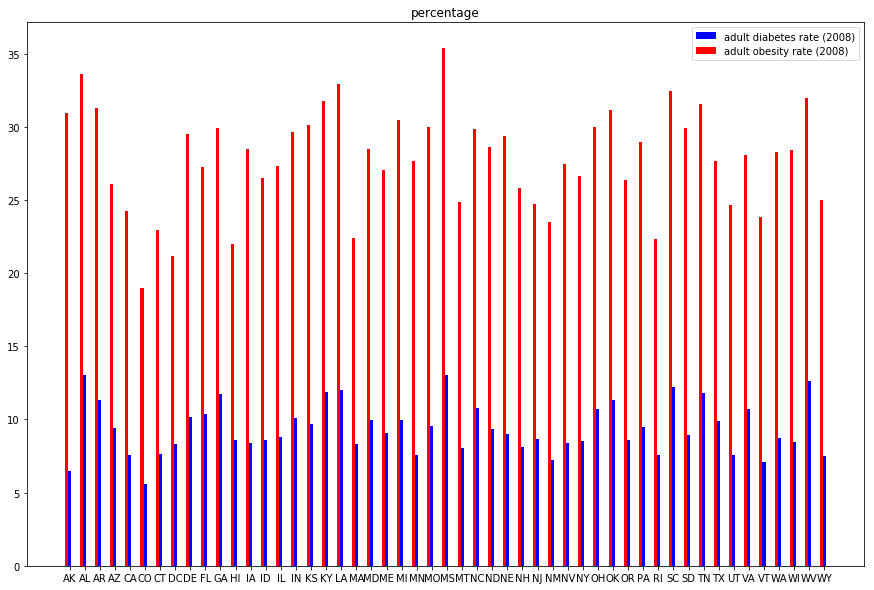

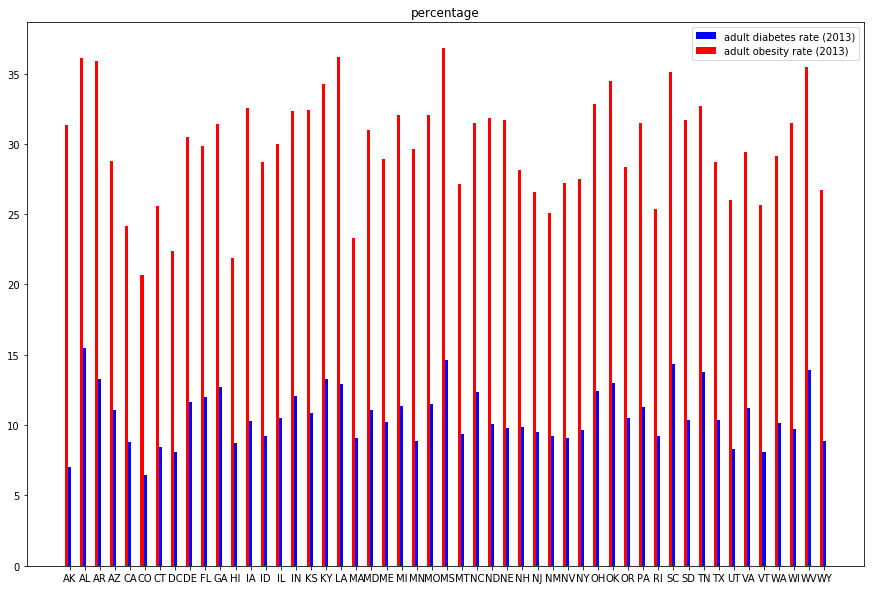

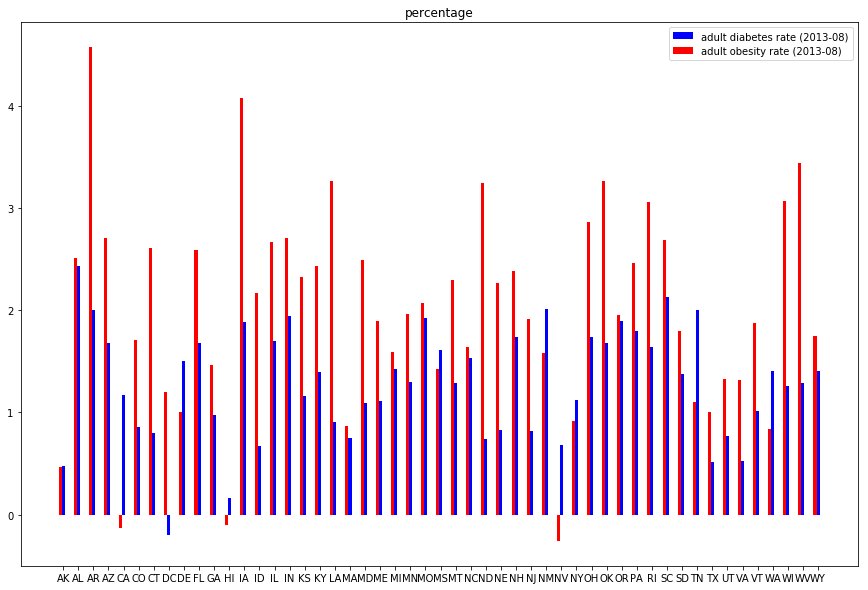

In [12]:
obese_08= pd.DataFrame(health.groupby("State")["PCT_OBESE_ADULTS08"].mean().reset_index())
diabetes_08 = pd.DataFrame(health.groupby("State")["PCT_DIABETES_ADULTS08"].mean().reset_index())

obdia_08 = pd.merge(obese_08,diabetes_08, on="State")

X = np.arange(len(obdia_08.State))

fig = plt.figure()
fig.set_size_inches(15,10)
ax = plt.subplot(111)

ax.bar(X, obdia_08.PCT_DIABETES_ADULTS08, width=0.2, color='b', align='center')

ax.bar(X-0.2, obdia_08.PCT_OBESE_ADULTS08, width=0.2, color='r', align='center')
ax.legend(("adult diabetes rate (2008)","adult obesity rate (2008)"))
plt.xticks(X, obdia_08.State)
plt.title("percentage", fontsize=12)

plt.show()




obese= pd.DataFrame(health.groupby("State")["PCT_OBESE_ADULTS13"].mean().reset_index())
diabetes = pd.DataFrame(health.groupby("State")["PCT_DIABETES_ADULTS13"].mean().reset_index())

obdia = pd.merge(obese,diabetes, on="State")

X = np.arange(len(obdia.State))

fig = plt.figure()
fig.set_size_inches(15,10)
ax = plt.subplot(111)

ax.bar(X, obdia.PCT_DIABETES_ADULTS13, width=0.2, color='b', align='center')

ax.bar(X-0.2, obdia.PCT_OBESE_ADULTS13, width=0.2, color='r', align='center')
ax.legend(("adult diabetes rate (2013)","adult obesity rate (2013)"))
plt.xticks(X, obdia.State)
plt.title("percentage", fontsize=12)

plt.show()



obese_13_08= pd.DataFrame(health.groupby("State")["pct_obese_change"].mean().reset_index())
diabetes_13_08 = pd.DataFrame(health.groupby("State")["pct_diabetes_change"].mean().reset_index())

obdia_13_08 = pd.merge(obese_13_08,diabetes_13_08, on="State")

X = np.arange(len(obdia_13_08.State))

fig = plt.figure()
fig.set_size_inches(15,10)
ax = plt.subplot(111)

ax.bar(X, obdia_13_08.pct_diabetes_change, width=0.2, color='b', align='center')

ax.bar(X-0.2, obdia_13_08.pct_obese_change, width=0.2, color='r', align='center')
ax.legend(("adult diabetes rate (2013-08)","adult obesity rate (2013-08)"))
plt.xticks(X, obdia_13_08.State)
plt.title("percentage", fontsize=12)

plt.show()


